In [28]:
# STUDENT:  SUTYRINA OLGA

# Celestial mechanics. Part 2

import numpy as np
from numpy import nan 
import matplotlib.pyplot as plt
import pandas as pd

import sgp4
from sgp4.earth_gravity import wgs72
from sgp4.io import twoline2rv

from datetime import datetime, timedelta
from pyorbital import orbital


# TLE "TERRA"
line__1 = '1 25994U 99068A   19054.10184924  .00000218  00000-0  58503-4 0  9995'
line__2 = '2 25994  98.2027 130.3160 0001269  90.2954 269.8420 14.57114546 20360'

lon_obs, lat_obs, alt_obs = 37., 55., 0
d = datetime(2019, 1, 30, 0, 0, 0)

In [29]:
## 2.1) Calculate satellite position at reference time ( Cartesian, lat-lon-alt , topocentric(az,el,range) 

sat = orbital.Orbital('ISS (TERRA)',
         line1 = line__1,
         line2 = line__2)

lon, lat, alt = sat.get_lonlatalt(d)
position, velocity = sat.get_position(d, normalize = False)

# lat-lon-alt
print("lon:",str(lon)) 
print("lat:",str(lat))
print("alt:",str(alt))
print()
# Cartesian position
print('Cartesian position X:', str(position[0]))
print('Cartesian position Y:', str(position[1]))
print('Cartesian position Z:', str(position[2]))
print()
# Topocentric(az,el,range)   range????
Azimuth, Elevation = sat.get_observer_look(d, lon_obs, lat_obs, alt_obs)
print("Azimuth:",str(Azimuth)) 
print("Elevation:",str(Elevation))

lon: -23.277721926532216
lat: 6.379034880570557
alt: 705.7637445452627

Cartesian position X: -1901.1553735711302
Cartesian position Y: 6778.7501209633765
Cartesian position Z: 782.3437838195002

Azimuth: 248.64569008834712
Elevation: -29.544085815720823


In [30]:
## 2.2)  Calculate AOS/LOS events for first contact with the ground station ( min. elevation level 10deg) 

angle = 10
time = 24

sat1 = orbital.Orbital('ISS (TERRA)',
         line1 = line__1,
         line2 = line__2)

s1 = sat1.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
print("AOS events:", s1[0][0].strftime('%Y-%m-%d %H:%M:%S'))
print("LOS events:", s1[0][1].strftime('%Y-%m-%d %H:%M:%S'))

AOS events: 2019-01-30 07:05:29
LOS events: 2019-01-30 07:11:05


In [31]:
## 2.3) Calculate first pass culmination event time and culmination elevation.

angle = 10
time = 24

sat1 = orbital.Orbital('ISS (TERRA)',
         line1 = line__1,
         line2 = line__2)

s1 = sat1.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
print("First pass culmination event time:", s1[0][2].strftime('%Y-%m-%d %H:%M:%S'))

obs_azim, obs_angle = sat1.get_observer_look(s1[0][2], lon_obs, lat_obs, alt_obs)

print("Culmination elevation:", str(obs_angle))

First pass culmination event time: 2019-01-30 07:08:18
Culmination elevation: 15.32476017640262


In [32]:
## 2.4) Calculate first 5 imaging events schedule for the target. Imaging incidence angle < 30deg.

angle = 60
time = 144

sat1 = orbital.Orbital('ISS (TERRA)',
         line1 = line__1,
         line2 = line__2)

s1 = sat1.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
t1 = []
for j in s1:
    obs_azim, obs_angle = sat1.get_observer_look(s1[0][2], lon_obs, lat_obs, alt_obs)
    if obs_angle > angle:
        print(j[2].strftime('%Y-%m-%d %H:%M:%S'))

2019-01-30 08:46:47
2019-01-31 19:04:39
2019-02-01 08:34:34
2019-02-03 19:35:15
2019-02-04 09:05:09


In [33]:
## 2.5) ** Simulate TLE sets for constellation of 4 satellites flying in 4 equally spaced orbital planes.
#         Use an existing set as a reference. Calculate first 5 imaging events schedule for the simulated constellation

angle = 60
time = 52

sat1 = orbital.Orbital('ISS (TERRA)',
         line1 = '1 25994U 99068A   19054.10184924  .00000218  00000-0  58503-4 0  9995',
         line2 = '2 25994  98.2027 130.3160 0001269  90.2954 269.8420 14.57114546 20360')
s1 = sat1.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
t1 = []
for j in s1:
    obs_azim, obs_angle = sat1.get_observer_look(s1[0][2], lon_obs, lat_obs, alt_obs)
    if obs_angle > angle:
        t1.append(j[2])

        
        
sat2 = orbital.Orbital('ISS (TERRA)',
         line1 = '1 25994U 99068A   19054.10184924  .00000218  00000-0  58503-4 0  9995',
         line2 = '2 25994  98.2027 220.3160 0001269  90.2954 269.8420 14.57114546 20360')
s2 = sat2.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
t2 = []
for j in s2:
    obs_azim, obs_angle = sat2.get_observer_look(s2[0][2], lon_obs, lat_obs, alt_obs)
    if obs_angle > angle:
        t2.append(j[2])

        
        
sat3 = orbital.Orbital('ISS (TERRA)',
         line1 = '1 25994U 99068A   19054.10184924  .00000218  00000-0  58503-4 0  9995',
         line2 = '2 25994  98.2027 310.3160 0001269  90.2954 269.8420 14.57114546 20360')
s3 = sat3.get_next_passes(d, time, lon_obs, lat_obs, alt_obs, tol = 0.001, horizon = angle)
t3 = []
for j in s3:
    obs_azim, obs_angle = sat3.get_observer_look(s3[0][2], lon_obs, lat_obs, alt_obs)
    if obs_angle > angle:
        t3.append(j[2])


for i in sorted(t1+t2+t3):
    print(i.strftime('%Y-%m-%d %H:%M:%S'))

2019-01-30 08:46:47
2019-01-31 00:57:01
2019-01-31 07:32:09
2019-01-31 14:26:54
2019-01-31 19:04:39
2019-01-31 21:02:04


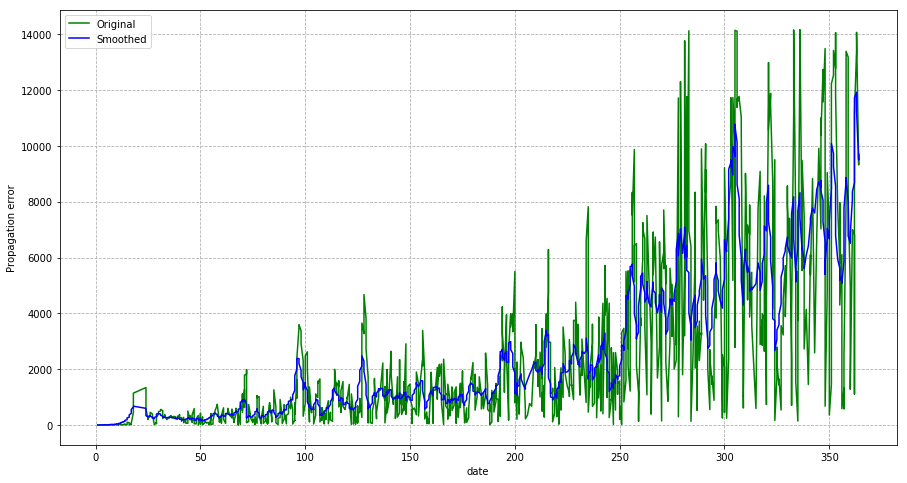

In [34]:
# 2.6) *** Select one of provided TLE files with one year coverage 
#        and investigate increase of propagation error vs epoch age. 
#        Present results in either tabular or (better) graphical form ( error vs te age)


from pandas.compat import StringIO, BytesIO

handle = open(r'D:/terra/terra-2018.tle', "r")
data = handle.read()


a = pd.read_csv(StringIO(data), header = None)


df = pd.DataFrame({'date':[]})
d = datetime(2019, 1, 1, 0, 0, 0)
# Базовое

line_1 = a[0][len(a[0])-2]
line_2 = a[0][len(a[0])-1]

satellite1 = orbital.Orbital('ISS (TERRA)',
                              line1 = line_1,
                              line2 = line_2)

position1, velocity1 = satellite1.get_position(d, normalize = False) ## 2019-01-30T00:00:00  
x_b, y_b, z_b = position1            
 
Summ = []             

for i in range(len(a[0])-4,0,-3):    
    line__1 = a[0][i - 1]
    line__2 = a[0][i]
    satellite2 = twoline2rv(line__1, line__2, wgs72)
    satellite = orbital.Orbital('ISS (TERRA)',
                                line1 = line__1,
                                line2 = line__2)
    position, velocity = satellite.get_position(d, normalize = False) ## 2019-01-30T00:00:00 
    x_, y_, z_ = position
    f = ((x_ - x_b)**2 + (y_ - y_b)**2 + (z_ - z_b)**2)**0.5
    Summ = [f] + Summ
    df = df.append({'date':satellite2.epoch.timetuple().tm_yday}, ignore_index=True)


v = pd.Series(Summ, index = df.date)   #df.date
m = v.ewm(span = 13).mean()

plt.figure(figsize=(15,8))
#plt.axis(['2018-1-1','2019-1-1', 0, 14100])
v.plot(color = 'g')
m.plot(color = 'b')
plt.ylabel('Propagation error')
plt.grid(linestyle='--')
plt.legend(('Original', 'Smoothed'),
             loc='upper left')
plt.show()